### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

    **Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [13]:
def load_data(file_path='../data/coupons.csv'):
    data = pd.read_csv(file_path)
    return data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [19]:
data = load_data()

styled_table = data.head().style.set_caption("First Five Rows of the Coupons Dataset") \
    .set_table_styles(
        [{
            'selector': 'caption',
            'props': [
                ('caption-side', 'top'),
                ('text-align', 'left'),
                ('font-weight', 'bold'),
                ('font-size', '16px')
            ]
        }]
    )

styled_table


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# data.info() # determine how many rows (12,684)
num_rows = data.shape[0]
print(f"{num_rows:,} total rows")

12,684 total rows


In [6]:
display(data.isnull().sum().sort_values(ascending=False))  # total number missing

missing_percent = data.isnull().mean().sort_values(ascending=False)
# Filter columns with missing data and format as a percentage string
formatted_missing = missing_percent[missing_percent > 0].apply(lambda x: f"{x*100:.2f}%")
display(formatted_missing)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
weather                     0
temperature                 0
destination                 0
passanger                   0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
income                      0
occupation                  0
has_children                0
education                   0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

car                     99.15%
CoffeeHouse              1.71%
Restaurant20To50         1.49%
CarryAway                1.19%
RestaurantLessThan20     1.02%
Bar                      0.84%
dtype: object

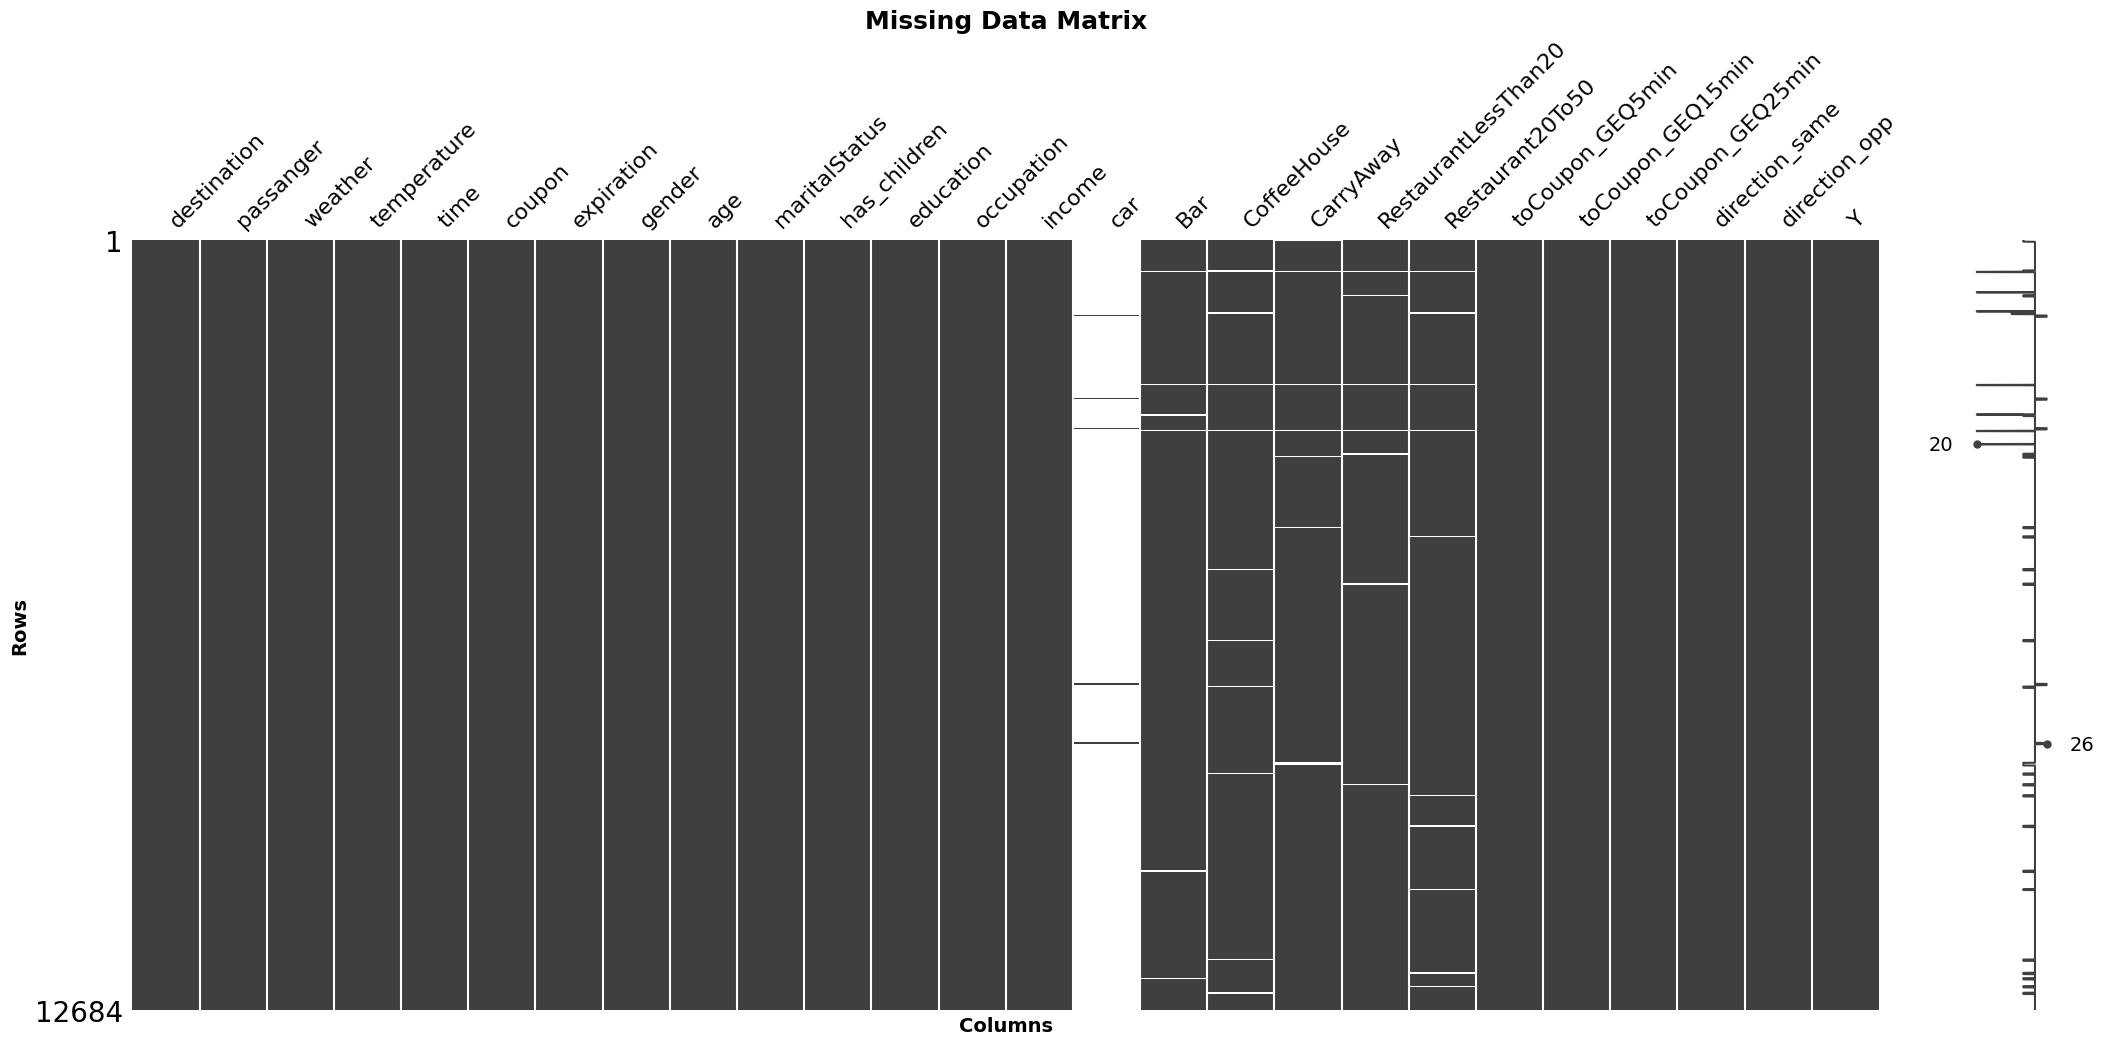

In [7]:
msno.matrix(data)
plt.title("Missing Data Matrix", fontsize=18, fontweight='bold')
plt.xlabel("Columns", fontsize=14, fontweight='bold')
plt.ylabel("Rows", fontsize=14, fontweight='bold')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data.drop(columns=['car'], inplace=True)
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[cols_to_fill] = data[cols_to_fill].fillna("Never")

In [9]:
missing_values = data.isnull().sum()
missing_values

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

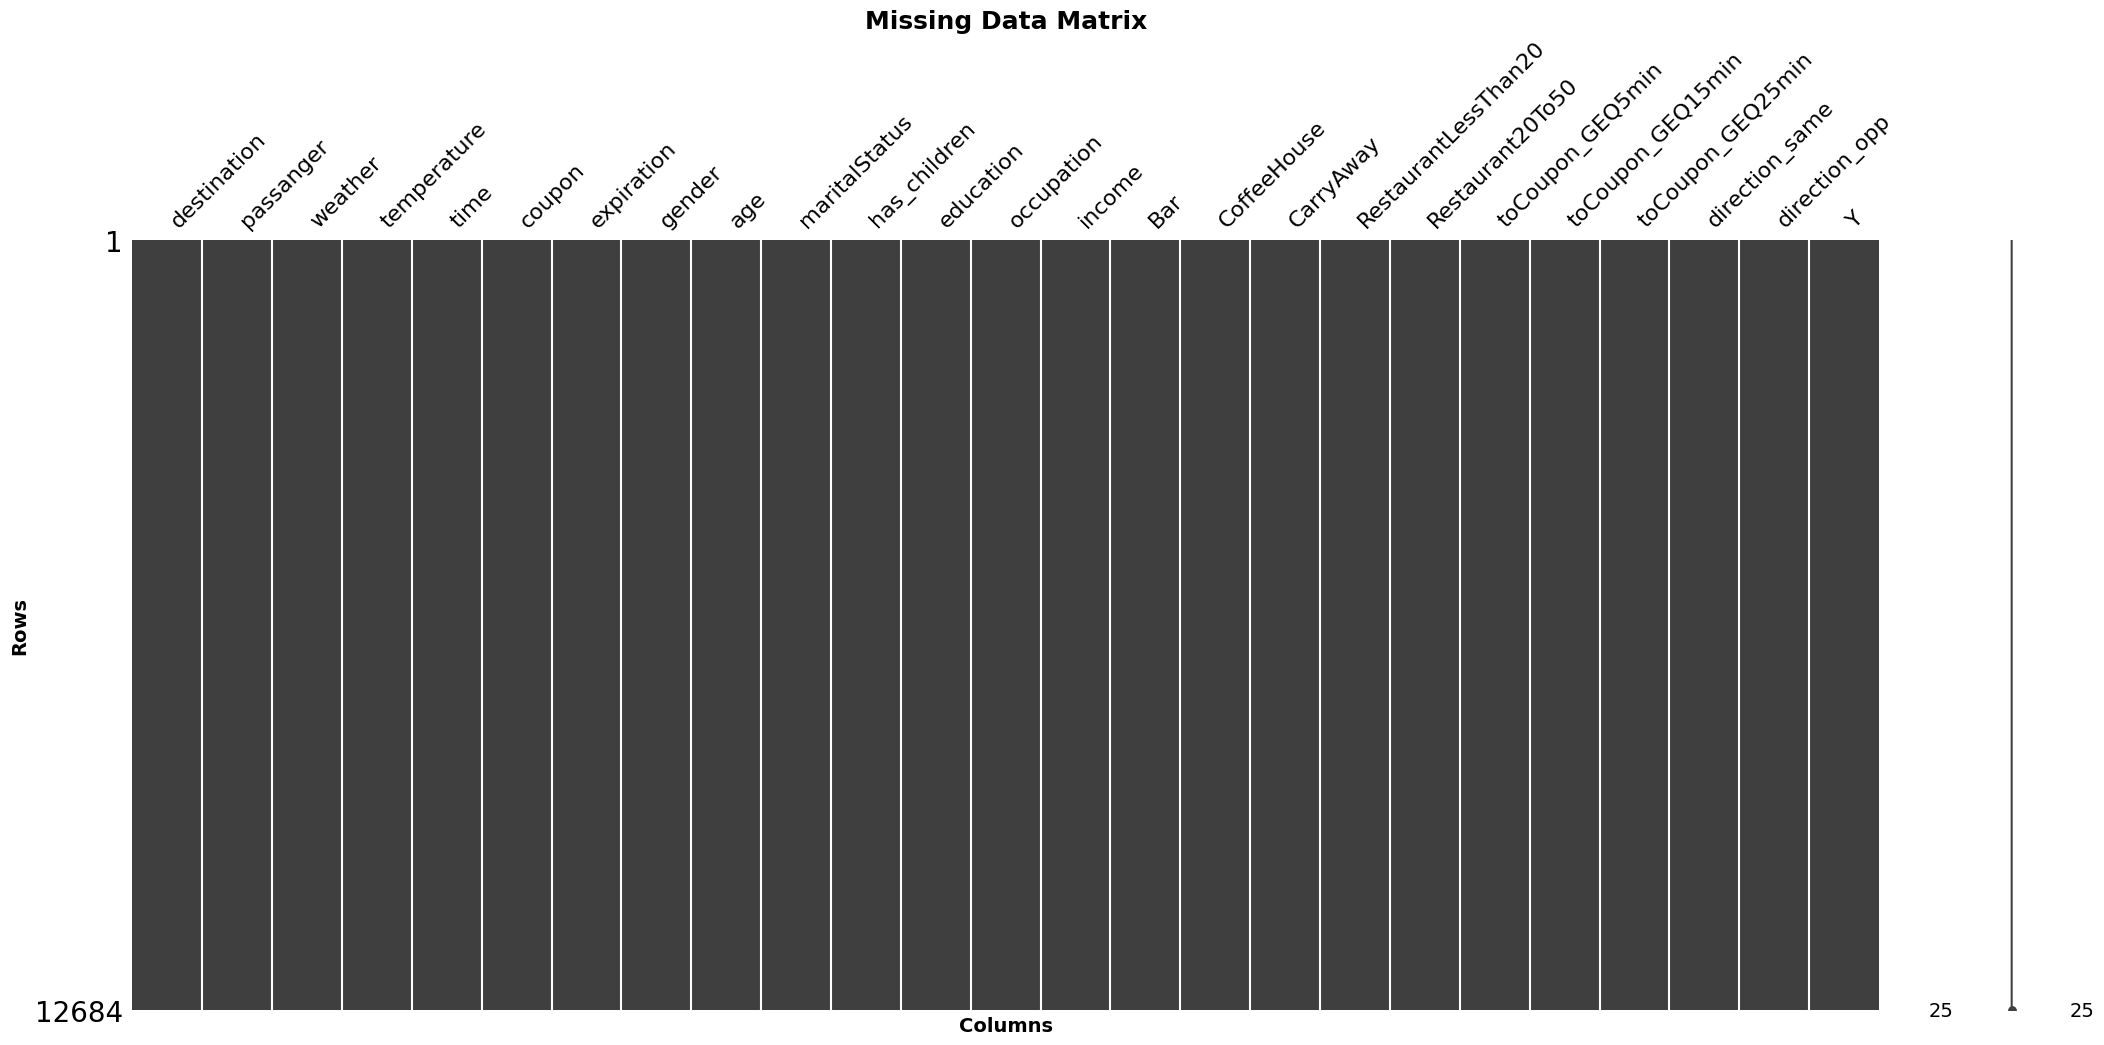

In [10]:
msno.matrix(data)
plt.title("Missing Data Matrix", fontsize=18, fontweight='bold')
plt.xlabel("Columns", fontsize=14, fontweight='bold')
plt.ylabel("Rows", fontsize=14, fontweight='bold')
plt.show()

4. What proportion of the total observations chose to accept the coupon?



In [11]:
acceptance_rate = data['Y'].mean()
acceptance_percent = acceptance_rate * 100
acceptance_percent
formatted_answer = f"{int(acceptance_percent)}% of the total observations chose to accept the coupon"
print(formatted_answer)

56% of the total observations chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

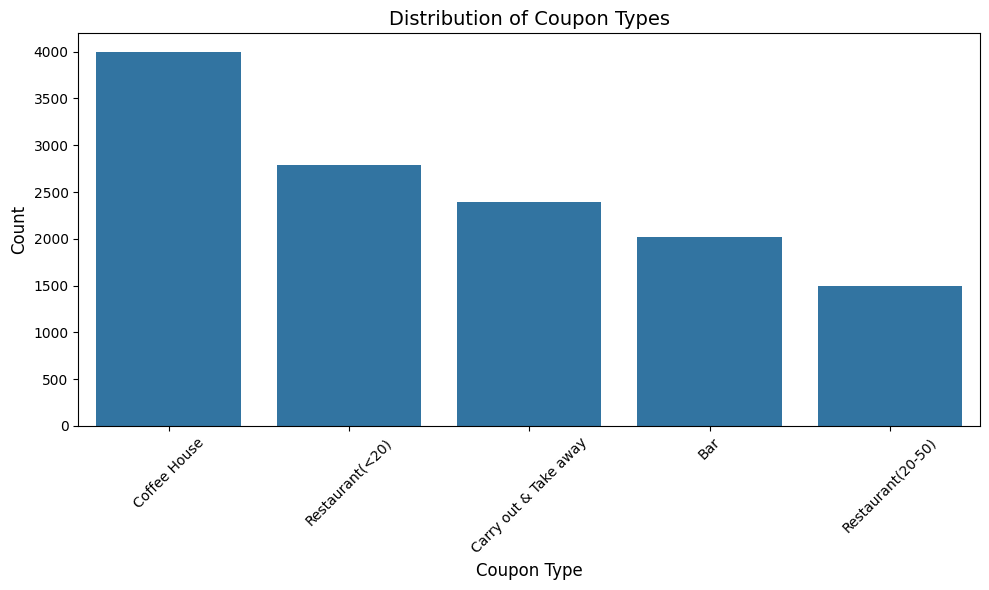

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, ax=ax)

ax.set_title('Distribution of Coupon Types', fontsize=14)
ax.set_xlabel('Coupon Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for legibility

plt.tight_layout()
plt.show()



6. Use a histogram to visualize the temperature column.

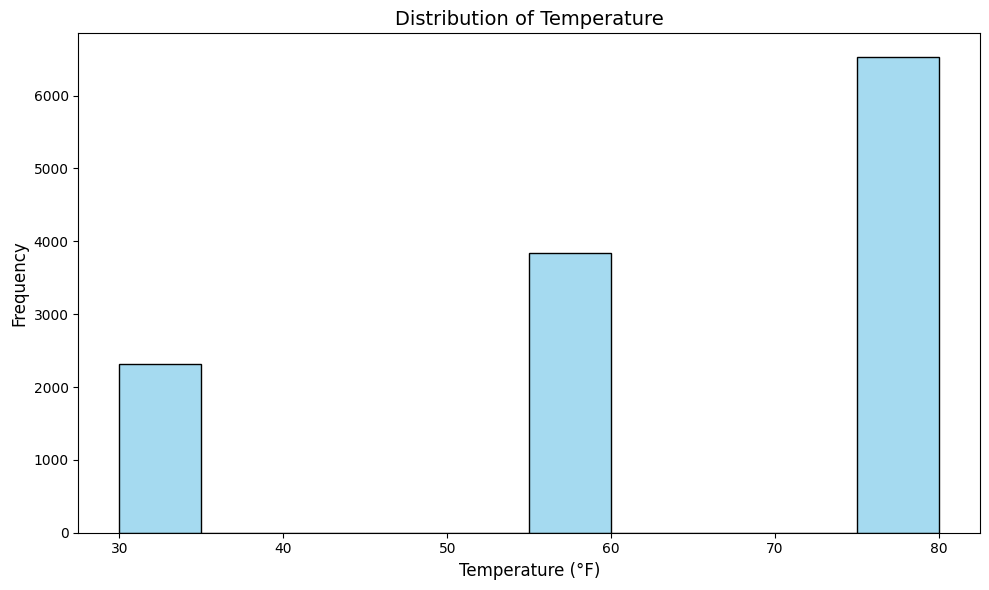

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram using Seaborn
sns.histplot(data=data, x='temperature', bins=10, color='skyblue', kde=False, ax=ax)

# Set human-readable labels and descriptive title
ax.set_title('Distribution of Temperature', fontsize=14)
ax.set_xlabel('Temperature (°F)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Adjust layout for readability and display the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_coupons_df = data[data['coupon'] == 'Bar']

display(bar_coupons_df)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [15]:
bar_acceptance_rate = bar_coupons_df['Y'].mean()
bar_acceptance_percent = bar_acceptance_rate * 100
bar_acceptance_percent

formatted_answer = f"{int(bar_acceptance_percent)}% of bar coupons were accepted"
print(formatted_answer)

41% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
# bar_coupons_df.columns # full look of list of columns

bar_coupons_df = data[data['coupon'] == 'Bar'].copy()  # Create a deep copy

# Handle missing values for 'Bar' column by replacing NaN with '0' (assuming non-visitation)
bar_coupons_df.loc[:, 'Bar'] = bar_coupons_df['Bar'].fillna('0')

# Categorize users based on bar visit frequency using .loc
bar_coupons_df.loc[:, 'bar_frequency_group'] = bar_coupons_df['Bar'].apply(
    lambda x: '3 or fewer' if x in ['0', 'less1', '1~3'] else 'More than 3'
)

# Calculate the acceptance rate for each group
acceptance_rates = bar_coupons_df.groupby('bar_frequency_group')['Y'].mean().mul(100).round(0)
formatted_rates = acceptance_rates.astype(int).astype(str) + "%"


# Display the acceptance rates
print(formatted_rates)

bar_frequency_group
3 or fewer     53%
More than 3    30%
Name: Y, dtype: object


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# Create a new DataFrame containing only rows where the coupon type is "Bar"
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()  # Ensure deep copy to avoid warnings

# Handle missing values for 'Bar' column by replacing NaN with '0' (assuming non-visitation)
bar_coupons_df.loc[:, 'Bar'] = bar_coupons_df['Bar'].fillna('0')

# Define a function to categorize bar visitation frequency
def categorize_bar_visits(visits):
    if visits in ['0', 'less1']:
        return '1 or fewer'
    else:
        return 'More than 1'

# Apply the function to create a new column
bar_coupons_df.loc[:, 'bar_frequency_group'] = bar_coupons_df['Bar'].apply(categorize_bar_visits)

# Define a function to categorize age
def categorize_age(age):
    return 'Over 25' if age not in ['below21', '21', '22', '23', '24', '25'] else '25 or younger'

# Apply the function to create a new column
bar_coupons_df.loc[:, 'age_group'] = bar_coupons_df['age'].apply(categorize_age)

# Create a new column indicating the target group: Drivers who go to a bar more than once a month and are over 25
bar_coupons_df.loc[:, 'target_group'] = (bar_coupons_df['bar_frequency_group'] == 'More than 1') & (bar_coupons_df['age_group'] == 'Over 25')

# Calculate acceptance rate for the target group vs. all others
acceptance_rates = bar_coupons_df.groupby('target_group')['Y'].mean().mul(100).round(0)
formatted_rates = acceptance_rates.astype(int).astype(str) + "%"
# Display results
# acceptance_rates
print(formatted_rates)


target_group
False    45%
True     37%
Name: Y, dtype: object


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [19]:
# Create a new DataFrame containing only rows where the coupon type is "Bar"
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()  # Ensure deep copy to avoid warnings

# Handle missing values for 'Bar' column by replacing NaN with '0' (assuming non-visitation)
bar_coupons_df.loc[:, 'Bar'] = bar_coupons_df['Bar'].fillna('0')

# Define a function to categorize bar visitation frequency
def categorize_bar_visits(visits):
    if visits in ['0', 'less1']:
        return '1 or fewer'
    else:
        return 'More than 1'

# Apply the function to create a new column
bar_coupons_df.loc[:, 'bar_frequency_group'] = bar_coupons_df['Bar'].apply(categorize_bar_visits)

# Define a function to filter occupations (excluding farming, fishing, or forestry)
def categorize_occupation(occupation):
    return occupation not in ['Farming Fishing & Forestry']

# Create a new column for occupation filtering
bar_coupons_df.loc[:, 'valid_occupation'] = bar_coupons_df['occupation'].apply(categorize_occupation)

# Create a new column for passenger filtering (excluding those with kids)
bar_coupons_df.loc[:, 'valid_passenger'] = bar_coupons_df['passanger'] != 'Kid(s)'

# Create a new column indicating the target group:
# Drivers who go to bars more than once a month, have a passenger that is NOT a kid, and work in occupations other than farming, fishing, or forestry
bar_coupons_df.loc[:, 'target_group'] = (
    (bar_coupons_df['bar_frequency_group'] == 'More than 1') &
    (bar_coupons_df['valid_passenger']) &
    (bar_coupons_df['valid_occupation'])
)

# Calculate acceptance rate for the target group vs. all others
acceptance_rates = bar_coupons_df.groupby('target_group')['Y'].mean() * 100
formatted_rates = acceptance_rates.astype(int).astype(str) + "%"

# Display results
# acceptance_rates
print(formatted_rates)

target_group
False    39%
True     41%
Name: Y, dtype: object


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [20]:
# Create a new DataFrame containing only rows where the coupon type is "Bar" or "RestaurantLessThan20"
bar_coupons_df = data.copy()  # Ensure deep copy to avoid warnings

# Handle missing values for relevant columns by replacing NaN with '0' (assuming non-visitation)
bar_coupons_df.loc[:, 'Bar'] = bar_coupons_df['Bar'].fillna('0')
bar_coupons_df.loc[:, 'RestaurantLessThan20'] = bar_coupons_df['RestaurantLessThan20'].fillna('0')

# Define a function to categorize bar visitation frequency
def categorize_bar_visits(visits):
    return 'More than 1' if visits not in ['0', 'less1'] else '1 or fewer'

# Apply the function to create a new column
bar_coupons_df.loc[:, 'bar_frequency_group'] = bar_coupons_df['Bar'].apply(categorize_bar_visits)

# Define a function to categorize restaurant visitation frequency
def categorize_restaurant_visits(visits):
    return 'More than 4' if visits in ['4~8', 'gt8'] else '4 or fewer'

# Apply the function to create a new column
bar_coupons_df.loc[:, 'restaurant_frequency_group'] = bar_coupons_df['RestaurantLessThan20'].apply(categorize_restaurant_visits)

# Define a function to categorize age
def categorize_age(age):
    return 'Under 30' if age in ['below21', '21', '22', '23', '24', '25', '26', '27', '28', '29'] else '30 or older'

# Apply the function to create a new column
bar_coupons_df.loc[:, 'age_group'] = bar_coupons_df['age'].apply(categorize_age)

# Create a new column for passenger filtering (excluding those with kids)
bar_coupons_df.loc[:, 'valid_passenger'] = bar_coupons_df['passanger'] != 'Kid(s)'

# Create a new column for marital status filtering (excluding widowed)
bar_coupons_df.loc[:, 'not_widowed'] = bar_coupons_df['maritalStatus'] != 'Widowed'

# Create a new column for income filtering (income less than 50K)
def categorize_income(income):
    return 'Less than 50K' if income in ['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'] else '50K or more'

bar_coupons_df.loc[:, 'income_group'] = bar_coupons_df['income'].apply(categorize_income)

# Create a new column indicating the target group:
# - Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# - Drivers who go to bars more than once a month and are under the age of 30 OR
# - Drivers who go to cheap restaurants more than 4 times a month and have income less than 50K

bar_coupons_df.loc[:, 'target_group'] = (
    ((bar_coupons_df['bar_frequency_group'] == 'More than 1') & (bar_coupons_df['valid_passenger']) & (bar_coupons_df['not_widowed'])) |
    ((bar_coupons_df['bar_frequency_group'] == 'More than 1') & (bar_coupons_df['age_group'] == 'Under 30')) |
    ((bar_coupons_df['restaurant_frequency_group'] == 'More than 4') & (bar_coupons_df['income_group'] == 'Less than 50K'))
)

# Calculate acceptance rate for the target group vs. all others
acceptance_rates = bar_coupons_df.groupby('target_group')['Y'].mean() * 100
formatted_rates = acceptance_rates.astype(int).astype(str) + "%"

# Display results
# acceptance_rates
print(formatted_rates)

target_group
False    54%
True     57%
Name: Y, dtype: object


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Frequent Bar-Goers Are Less Likely to Accept Coupons
- Younger Drivers Are More Likely to Accept Bar Coupons
- Passengers Impact Coupon Acceptance
- Income and Spending Habits Matter

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  